In [20]:
import pandas as pd
import numpy as np
import re

def load_data(option):
    if option == 0:
        with open('sample.txt') as f:
            data = f.read().splitlines()
    else:
        with open('input.txt') as f:
            data = f.read().splitlines()

    arr = pd.DataFrame(data).to_numpy()
    arr = [[int(num) for num in re.findall(r'-?\d+', row[0])] for row in arr]

    return arr

arr = load_data(0)
print(arr)

[[0, 4, 3, -3], [6, 3, -1, -3], [10, 3, -1, 2], [2, 0, 2, -1], [0, 0, 1, 3], [3, 0, -2, -2], [7, 6, -1, -3], [3, 0, -1, -2], [9, 3, 2, 3], [7, 3, -1, 2], [2, 4, 2, -3], [9, 5, -3, -3]]


In [23]:
import pandas as pd
import numpy as np
from tqdm import tqdm

arr = load_data(1)

w = 101
h = 103
mat = np.zeros((h, w))

# Find robot's last location
for row in arr:
    x = row[0]
    y = row[1]

    vx = row[2]
    vy = row[3]

    xf = (x + 100 * vx) % w
    yf = (y + 100 * vy) % h

    mat[yf][xf] += 1

# Find number of robot in each quadrant
mid = (h // 2, w // 2)
c1 = np.sum(mat[:mid[0], :mid[1]])
c2 = np.sum(mat[:mid[0], mid[1]+1:])
c3 = np.sum(mat[mid[0]+1:, :mid[1]])
c4 = np.sum(mat[mid[0]+1:, mid[1]+1:])
print(c1 * c2 * c3 * c4)

226548000.0


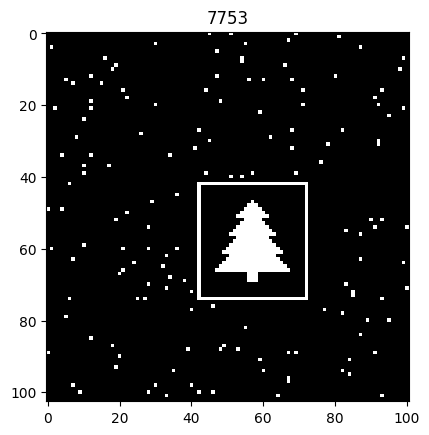

In [27]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

arr = load_data(1)

w = 101
h = 103

# Find robot's last location
sec = 1
while True:
    mat = np.zeros((h, w))

    for row in arr:
        x = row[0]
        y = row[1]

        vx = row[2]
        vy = row[3]

        xf = (x + sec * vx) % w
        yf = (y + sec * vy) % h

        mat[yf][xf] = 1
    
    if (sec - 77) % 101 == 0 and (sec - 28) % 103 == 0:
        plt.imshow(mat, cmap='gray')
        plt.title(sec)
        plt.show()
        break
    
    sec += 1